In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [14]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Exited'])
y=df['Exited']
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [17]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
x_train.shape

(8000, 11)

In [35]:
y_train.shape

(8000,)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
x_train_scaled=scaler.fit(x_train)
x_test_scaled=scaler.fit(x_test)

In [21]:
x_train_scaled
x_test_scaled

StandardScaler()

In [28]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [46]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [54]:
x_train_scaled = scaler.transform(x_train)
y_train_numpy = y_train.to_numpy()

history=model.fit(x_train_scaled, y_train_numpy, epochs=100, validation_split=0.2)


Epoch 1/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3177 - accuracy: 0.8731 - val_loss: 0.3437 - val_accuracy: 0.8469
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3176 - accuracy: 0.8723 - val_loss: 0.3434 - val_accuracy: 0.8500
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3179 - accuracy: 0.8702 - val_loss: 0.3430 - val_accuracy: 0.8494
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8720 - val_loss: 0.3429 - val_accuracy: 0.8494
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8717 - val_loss: 0.3422 - val_accuracy: 0.8481
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8736 - val_loss: 0.3436 - val_accuracy: 0.8481
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8723 - val_loss: 0.3461 - val_accuracy: 0.8506

In [38]:
# model.layers[0].get_weights()

[array([[-1.6373475e-04,  1.0306595e-01, -5.4760870e-02],
        [-4.2193353e-01, -1.7457283e+00,  6.7690235e-01],
        [ 4.3185759e-01, -2.9035360e-01,  7.3094651e-02],
        [-4.3996036e-01, -1.3555786e-01, -3.2331684e-01],
        [-2.5807869e-01, -1.5138856e-01, -1.4730022e+00],
        [ 2.0392069e-01,  8.8620231e-02,  2.8474537e-01],
        [ 8.1155473e-01,  1.1178230e-01, -6.3289362e-01],
        [ 4.3493893e-02,  6.0839251e-02,  2.1632774e-01],
        [-4.5247394e-01, -3.4628752e-01,  3.6310649e-01],
        [-1.6238050e-01,  5.2113026e-02, -8.2681626e-02],
        [ 5.7913572e-01,  1.7708892e-01, -5.2034680e-02]], dtype=float32),
 array([ 0.3432186 ,  0.28253788, -0.76730007], dtype=float32)]

In [50]:
x_test_scaled = scaler.transform(x_test)

predictions = model.predict(x_test_scaled)


63/63 [==============================] - 0s 2ms/step


In [51]:
predictions

array([[0.05105129],
       [0.09372156],
       [0.05251028],
       ...,
       [0.00917551],
       [0.02317848],
       [0.39436635]], dtype=float32)

In [52]:
final_pred=np.where(predictions>0.5,1,0)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,final_pred)

0.866

In [55]:
import matplotlib.pyplot as plt

In [56]:
history.history

{'loss': [0.31771236658096313,
  0.31763502955436707,
  0.3179228901863098,
  0.3180014491081238,
  0.3178658187389374,
  0.3172931373119354,
  0.3173384964466095,
  0.317256361246109,
  0.3171860873699188,
  0.3174426555633545,
  0.3168523609638214,
  0.31717345118522644,
  0.3165910840034485,
  0.3166680932044983,
  0.31699231266975403,
  0.3168865144252777,
  0.3160543143749237,
  0.316509485244751,
  0.3168160021305084,
  0.316306471824646,
  0.31623971462249756,
  0.315959632396698,
  0.3157801926136017,
  0.3161834478378296,
  0.31608420610427856,
  0.3158389925956726,
  0.31601768732070923,
  0.31602713465690613,
  0.31584328413009644,
  0.31571850180625916,
  0.3156993091106415,
  0.31543734669685364,
  0.31545376777648926,
  0.3155441880226135,
  0.3155060112476349,
  0.3158382177352905,
  0.31563109159469604,
  0.3152056932449341,
  0.3156340718269348,
  0.31570518016815186,
  0.3156750798225403,
  0.31543752551078796,
  0.3151790499687195,
  0.31481942534446716,
  0.31499812

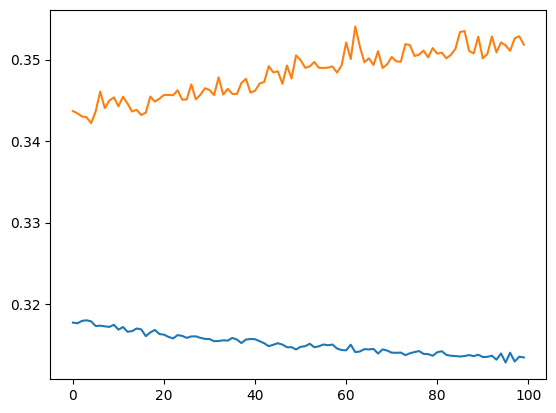

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

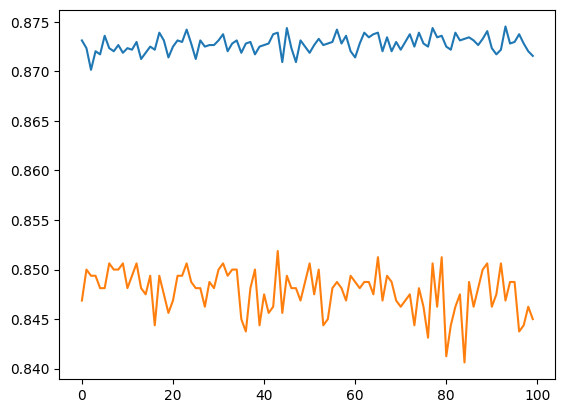

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])